In [87]:
import ROOT as R
import math
import ctypes

In [88]:
#Read 2-D E vs T histograms
tfile = R.TFile('/Users/cheng/workspace/Data/hadd_readAnaHists_timebin_cc_makehist_891_0119_v2//hists_official.root')
th2_all = tfile.Get('hitClusterDAQ/hist_timewindow_statusTrue_energy_time').Clone()
th2_all.RebinX(6)

#Read pileup correction histograms
tfile_pileup = R.TFile('/Users/cheng/workspace/Data/hadd_readAnaHists_timebin_cc_makehist_891_0119_v2//hists_PU_official.root')
raw = tfile_pileup.Get('rhoc').Clone()
raw.RebinX(6)
corrected = []
perts = []
for n in range(3):
    h_corr = tfile_pileup.Get('rhoc%s'%(n+1)).Clone()
    h_corr.RebinX(6)
    corrected.append(h_corr)
    deltaRho = tfile_pileup.Get('deltaRho%s'%(n+1)).Clone()
    deltaRho.RebinX(6)
    perts.append(deltaRho)


In [263]:
lm_path = '/Users/cheng/workspace/Data/hadd_cc_makehist_891_0119_v2/'
f_path = '/Users/cheng/workspace/Data/hadd_readAnaHists3_cc_makehist_891_0119_v2/'
# '/Users/cheng/workspace/Data/hadd_readAnaHists_timebin_cc_makehist_891_0119_v2//hists_PU_official.root'

fs = []
lm_hists = {}
fit_hists = {}
for e in [30,25,20]:
    for threshold in ['official','primary','residual','both']:
        if threshold=='official' and e!=30:
            continue
        if threshold == 'official':
            name_tag = 'official'
        else:
            name_tag = '%s_%s'%(threshold,e)
        fname = '%s/hist_LM_%s.root'%(lm_path,name_tag)
        fname_hist = '%s/hists_%s.root'%(f_path,name_tag)
        f = R.TFile(fname)
        fs.append(f)
        f_hist = R.TFile(fname_hist)
        # print f_hist
        fs.append(f_hist)
        lm_hists[name_tag] = f.Get('integral_hist').Clone()
        fit_hists[name_tag] = f_hist.Get('hitClusterDAQ/hist_timewindow_statusTrue_energy_time').Clone()
        

In [89]:
print th2_all.GetYaxis().GetBinWidth(1)
print th2_all.GetXaxis().GetBinWidth(1)

0.0299999988996
0.1492


0.1492


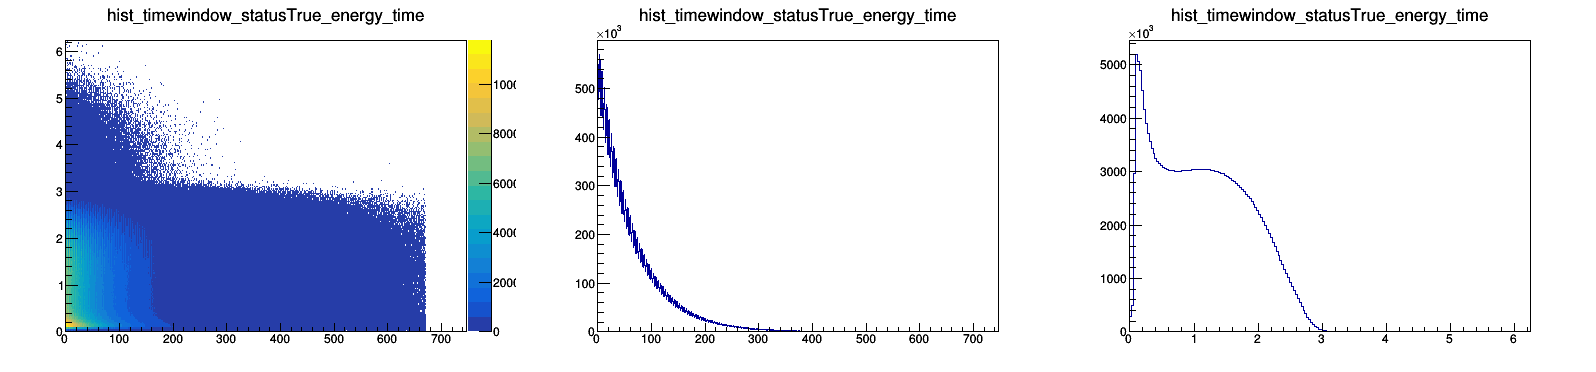

In [90]:
#original distributions
time_dist_all = th2_all.ProjectionX()
e_dist_all = th2_all.ProjectionY()
canvas = R.TCanvas('c1','c1',1600,400)
canvas.Divide(3)
canvas.cd(1)
th2_all.Draw("COLZ")
canvas.cd(2)
time_dist_all.Draw()
canvas.cd(3)
e_dist_all.Draw()
canvas.Draw()
print time_dist_all.GetBinWidth(1)

0.8952


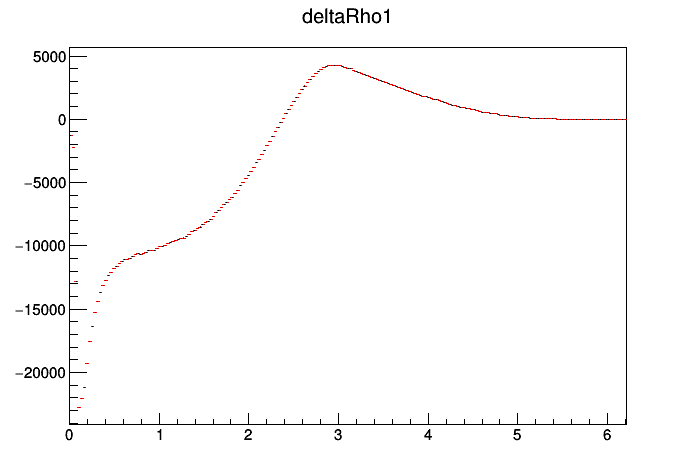

In [93]:
print time_dist_all.GetXaxis().GetBinWidth(1)*6
c = R.TCanvas()
corr.Draw('COLZ')
c.Draw()

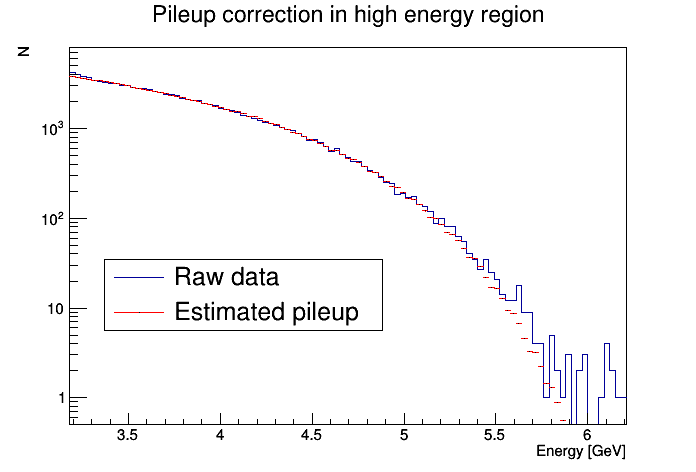

In [243]:
canvas = R.TCanvas()
e_raw = raw.ProjectionY()

R.gPad.SetLogy(1)
leg = R.TLegend(0.15,0.3,0.55,0.45)
leg.AddEntry(e_raw,'Raw data','L')

corr = perts[0].ProjectionY()
e_raw.GetXaxis().SetRangeUser(3.2,6.2)
corr.GetXaxis().SetRangeUser(3.2,6.2)
corr.SetLineColor(R.kRed)
leg.AddEntry(corr,'Estimated pileup')

e_raw.SetTitle('Pileup correction in high energy region;Energy [GeV];N')
e_raw.Draw("SAME")
corr.Draw('SAME')
leg.Draw()
canvas.Draw()

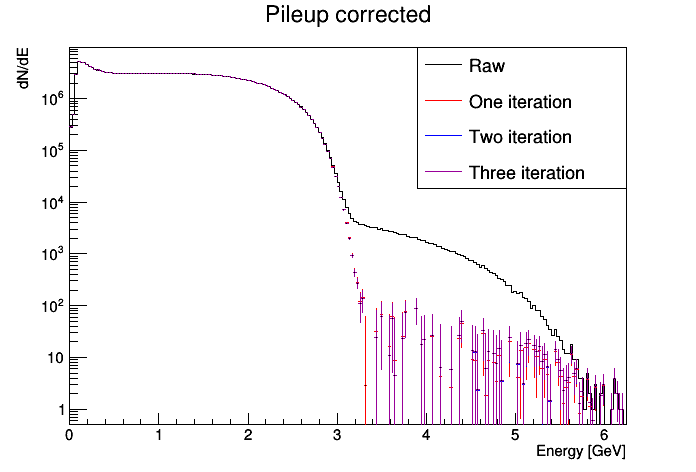

In [94]:
#pileup corrections
R.gStyle.SetOptStat(1)
canvas = R.TCanvas()
colors = [R.kRed, R.kBlue, R.kMagenta + 2]
names = [ 'One iteration', 'Two iteration','Three iteration']
e_raw = raw.ProjectionY()
e_raw.SetTitle('Pileup corrected;Energy [GeV];dN/dE')
e_corrs = []
leg = R.TLegend(0.6,0.6,0.9,0.9)
leg.AddEntry(e_raw,'Raw','L')
e_raw.SetLineColor(R.kBlack)
e_raw.Draw()
for n,hist in enumerate(corrected):
    e_corr = hist.ProjectionY()
    e_corr.SetLineColor(colors[n])
    e_corr.Draw('SAME')
    leg.AddEntry(e_corr,names[n],'L')
    e_corrs.append(e_corr)
leg.Draw()
R.gPad.SetLogy(1)
canvas.Draw()

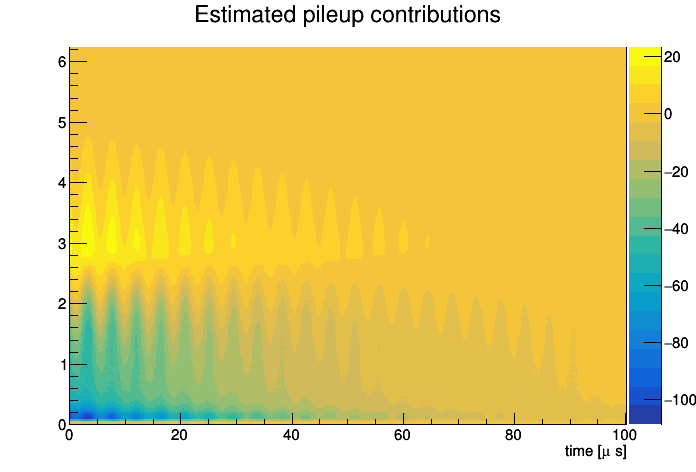

In [176]:
#perturbations
canvas = R.TCanvas()
corr_0 = perts[0].Clone()
corr_0.SetTitle('Estimated pileup contributions;time [#mu s];')
corr_0.GetXaxis().SetRangeUser(0,100)
corr_0.Draw('COLZ')
canvas.Draw()

Name: deltaRho1 Title: deltaRho1 NbinsX: 4000
Name: deltaRho2 Title: deltaRho2 NbinsX: 4000
Name: deltaRho3 Title: deltaRho3 NbinsX: 4000


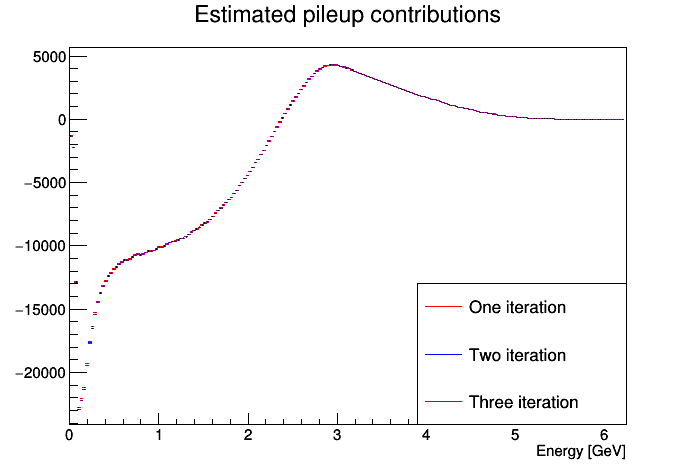

In [244]:
#perturbations
names = [ 'One iteration', 'Two iteration','Three iteration']
canvas = R.TCanvas()
e_corrs = []
leg = R.TLegend(0.6,0.1,0.9,0.4)
for n,hist in enumerate(perts):
    print hist
    e_corr = hist.ProjectionY()
    e_corr.SetTitle('Estimated pileup contributions;Energy [GeV];')
    
    e_corr.SetLineColor(colors[n])
    e_corr.Draw('SAME')
    leg.AddEntry(e_corr,names[n],'L')
    e_corrs.append(e_corr)
leg.Draw()
R.gPad.SetLogy(0)
canvas.Draw()

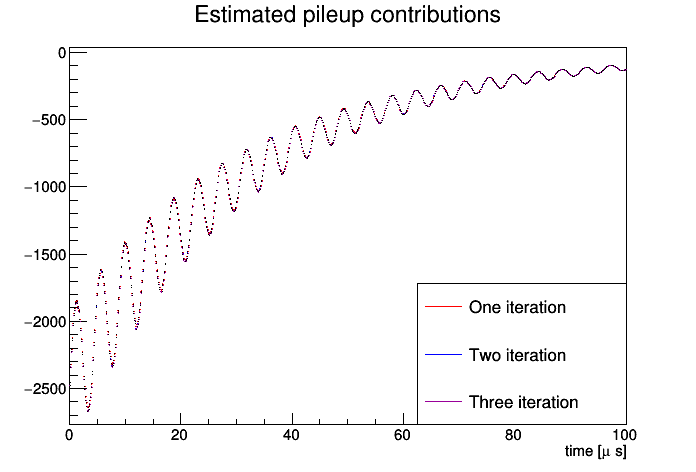

In [245]:
#perturbations
canvas = R.TCanvas()
t_corrs = []
leg = R.TLegend(0.6,0.1,0.9,0.4)
for n,hist in enumerate(perts):
    t_corr = hist.ProjectionX()
    t_corr.SetTitle('Estimated pileup contributions;time [#mu s];')
    t_corr.GetXaxis().SetRangeUser(0,100)
    t_corr.SetLineColor(colors[n])
    t_corr.Draw('SAME')
    leg.AddEntry(t_corr,names[n],'L')
    t_corrs.append(t_corr)
leg.Draw()
R.gPad.SetLogy(0)
canvas.Draw()

In [179]:
#wiggles fit
time_end = 300
cyclotron = 0.149 # micro-second
gamma = 29.3
omega_a_ref =  2 * math.pi / (gamma * cyclotron)
five_param_str = '[0]*exp(-x/[1])*(1+[2]*cos(x*[5]*(1+[4]*1e-6))+[3]*sin(x*[5]*(1+[4]*1e-6)))'
fitFunc = R.TF1('fitFunc',five_param_str,20, time_end)
R.gStyle.SetOptFit(1111)
R.gStyle.SetOptStat(0)
fitFunc.SetNpx(1000)
fitFunc.SetParName(0, "N")
fitFunc.SetParName(1, "#tau")
fitFunc.SetParName(2, "A_{c}")
fitFunc.SetParName(3, "A_{s}")
fitFunc.SetParName(4, "R")
fitFunc.SetLineColor(R.kRed)

fitFunc.SetParameters(2.24711e+05, 6.45555e+01, 0.4, 0.0, 433, omega_a_ref)
fitFunc.FixParameter(5, omega_a_ref)
def FiveParameterFit(wiggle_hist,fitFunc):
    print 'bin width = ',wiggle_hist.GetBinWidth(1)
    fitFunc.SetParameters(1.e5, 66.38, 0.4, 0.0, 433, omega_a_ref)
    wiggle_hist.Fit(fitFunc, "EMQ",'',20,time_end)
    wiggle_hist.SetTitle('; time [#mu s]; N / {0} #mu s'.format(0.1492))
    wiggle_hist.GetYaxis().SetTitleOffset(1)
    R.gPad.SetLogy(1)
    wiggle_hist.GetXaxis().SetRangeUser(20,time_end)    
    wiggle_hist.SetStats(0)
    wiggle_hist.SetStats(1)

In [102]:
#fit wiggles

e_raw = raw.ProjectionX('raw',57,208)
FiveParameterFit(e_raw,fitFunc)
e_raw.SetTitle('No correction')
print e_raw.Integral()
e_corrected = []
names = ['One iteration','Two iterations','Three iterations']
for n in range(3):
    e_corr = corrected[n].ProjectionX('corr%s'%(n+1),57,208)
    FiveParameterFit(e_corr,fitFunc)
    e_corr.SetTitle(names[n])
    e_corrected.append(e_corr)

bin width =  0.1492
44195992.0
bin width =  0.1492
bin width =  0.1492
bin width =  0.1492


In [120]:
def PhaseFit(wiggle,fitModel,t_start,t_end):
    wiggle.Fit(fitModel,'EMQ','',t_start,t_end)
    phi = fitModel.GetParameter(3)
    if phi < - math.pi/2:    
        fitModel.SetParameter(3,phi+math.pi)
        fitModel.SetParameter(2,0.-fitModel.GetParameter(2))
        wiggle.Fit(fitModel,'EMQ','',t_start,t_end)
    elif phi > math.pi/2: 
        fitModel.SetParameter(3,phi-math.pi)
        fitModel.SetParameter(2,0.-fitModel.GetParameter(2))
        wiggle.Fit(fitModel,'EMQ','',t_start,t_end)



def FitScan_energySlices(bin_limit,hist_2d,fitModel):
    energy_low = int((bin_limit[0]-1) * e_bin_width)
    energy_high = int(bin_limit[1] * e_bin_width)
    slice_name = 'Slice_%s_%s_MeV'%(energy_low,energy_high)
    wiggle = hist_2d.ProjectionX(slice_name,bin_limit[0],bin_limit[1])
    fitModel.SetNpx(1000)
    wiggle.SetTitle('{0:}; time [#mu s]; N / {1} #mu s'.format(slice_name, t_bin_width))
    PhaseFit(wiggle,fitModel,t_start,t_end)
    return wiggle

def Draw_graph_and_error(central_graph,error_graph,isMeanLine=False,legPos=[0.43,0.77],error_name='Uncertainty'):
    if isMeanLine:
        central_graph.Fit('pol0','Q')
        funcLine = central_graph.GetFunction('pol0')
        funcLine.SetLineColor(R.kBlue)
        funcLine.SetLineWidth(1)
        funcLine.SetLineStyle(4)

    lineWidth = 1 if not isMeanLine else 2
    R.gStyle.SetOptStat(0)
    R.gStyle.SetOptFit(0)
    c = R.TCanvas()    
    central_graph.SetMarkerSize(1)
    central_graph.SetMarkerStyle(2)
    central_graph.SetLineWidth(lineWidth)
    error_graph.SetLineColor(2)
    error_graph.SetLineWidth(lineWidth)
    p1 = R.TPad("p1", "", 0, 0, 1, 1);
    p1.SetGrid();
    p1.Draw();
    p1.cd();
    central_graph.Draw("AC");
    central_graph.GetHistogram().GetXaxis().SetTitleOffset(1.25);
    central_graph.GetHistogram().GetYaxis().SetTitleOffset(1.25);
    R.gPad.Update();
    p2 = R.TPad("p2", "", 0, 0, 1, 1);
    p2.SetFillStyle(4000)
    xmin = p1.GetUxmin();
    xmax = p1.GetUxmax();
    ymin = error_graph.GetHistogram().GetMinimum();
    ymax = error_graph.GetHistogram().GetMaximum();
    dx = (xmax - xmin) / 0.8; # 10 percent margins left and right
    dy = (ymax - ymin) / 0.8; # 10 percent margins top and bottom
    p2.Range(xmin-0.1*dx, ymin-0.1*dy, xmax+0.1*dx, ymax+0.1*dy);
    p2.Draw();
    p2.cd();
    error_graph.Draw("LP");
    R.gPad.Update();    
    axis = R.TGaxis(xmax, ymin, xmax, ymax, ymin, ymax, 510, "+L");
    axis.SetTitleColor(R.kRed);
    axis.SetLabelColor(R.kRed);
    axis.SetLineColor(R.kRed);
    axis.Draw();
    R.gPad.Update();
    # leg = R.TLegend(0.43, 0.77, 0.78, 0.90);
    leg = R.TLegend(legPos[0], legPos[1], legPos[0]+0.35, legPos[1]+0.13);
    leg.SetFillColor(R.gPad.GetFillColor());
    leg.SetTextAlign(22);
    leg.AddEntry(central_graph, "Central value", "EP");
    leg.AddEntry(error_graph, "Uncertainty", "L");
    if isMeanLine:
        leg.AddEntry(funcLine,'weighted mean value','L')

    leg.Draw();
    R.gPad.Update();    
    c.cd();
    return [c,leg,axis]

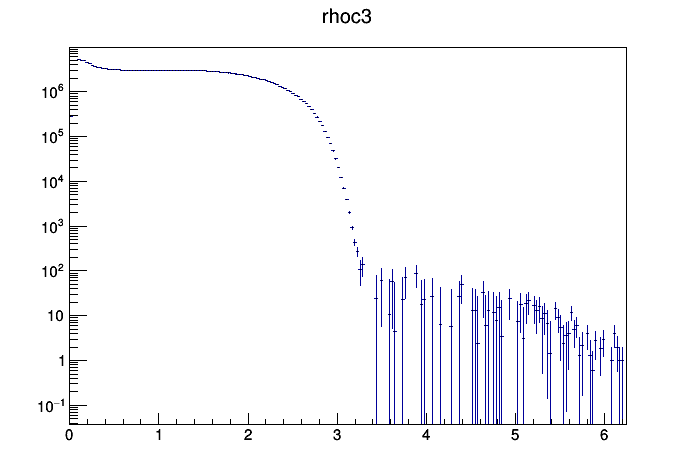

In [121]:
c = R.TCanvas()
c.SetLogy(1)
px = corrected[2].ProjectionY()
px.Draw()
c.Draw()

In [131]:
t_start = 30
t_end = 400
t_bin_width = 0.1492


#names convention
names = ['N','tau','Ac','As','R']
namesPhase = ['N','tau','A','phi','R']

#build fit phase-fit model 
five_param_phase_str = '[0]*exp(-x/[1])*(1+[2]*cos(x*[5]*(1+[4]*1e-6)-[3]))'
phase_fit = R.TF1('phasefit', five_param_phase_str, t_start, t_end)
phase_fit.SetParNames('N', '#tau', 'A', '#phi', 'R', '#omega_{a} ref')
phase_fit.SetParameters(2.24711e+05, 64.5555, 0.2, 0, 116., omega_a_ref)
phase_fit.FixParameter(5, omega_a_ref)
phase_fit.SetParLimits(3, -math.pi/2-0.1, math.pi/2+0.1)
phase_fit.SetNpx(1000)
phase_fit.SetLineColor(R.kRed)

In [132]:
print corrected[2].GetNbinsY()
print corrected[2].GetYaxis().FindBin(1.7)
print corrected[2].GetYaxis().FindBin(2.5)

208
57
84


In [257]:
names = ['N','tau','Ac','As','R']
namesPhase = ['N','tau','A','phi','R']
xmins = []
hists = [raw.Clone()] + [corrected[n].Clone() for n in range(3)]
central_graphs_Ts = []
error_graphs_Ts = []
# th2_all_origin = corrected[2].Clone()
for th2_all_origin in hists:
    e_bin_width = th2_all_origin.GetYaxis().GetBinWidth(1)
    #energy threshold scan T method
    central_graphs_T = [R.TGraphErrors() for n in range(5)]
    error_graphs_T = [R.TGraph() for n in range(5)]
    name_temp = 'energythreshold_%s_%s'
    #setup graphs
    for n in range(5):
        central_graphs_T[n].SetName(name_temp%(names[n],'graph'))
        error_graphs_T[n].SetName(name_temp%(names[n],'error'))
        central_graphs_T[n].SetTitle(';%s;%s'%('Energy threshold [GeV]',names[n]))
        error_graphs_T[n].SetTitle(';%s;%s'%('Energy threshold [GeV]',names[n]))
    NbinsY = th2_all_origin.GetNbinsY()
    #do scan
    phase_fit.SetParameters(2e+5, 66.38, 0.4, 0.0, 433, omega_a_ref)
    nstart = 40
    nend = 80
    for n in range(nstart,nend):
        this_threshold = (n) * e_bin_width
        wiggle = th2_all_origin.ProjectionX('wiggle_energy_thres_%s_GeV'%(this_threshold),n,NbinsY)
        PhaseFit(wiggle,phase_fit,t_start,t_end)
        # wiggle.Fit(phase_fit,'EMQ','',t_start,t_end)
        for m in range(5):
            value = phase_fit.GetParameter(m)
            error = phase_fit.GetParError(m)
            # if m==4:
            #     print '{0:<.3f}   {1:<.3f}'.format(value,error)
            central_graphs_T[m].SetPoint(n-nstart,this_threshold,value)
            central_graphs_T[m].SetPointError(n-nstart,0.,error)
            error_graphs_T[m].SetPoint(n-nstart,this_threshold,error)
    central_graphs_Ts.append(central_graphs_T)
    error_graphs_Ts.append(error_graphs_T)

    xs = []
    for n in range(2000):
        xs.append(error_graphs_T[4].Eval(1.6+n*0.0001))
        if xs[-1]<min:
            min = xs[-1]
            xmin = 1.6+n*0.0001
    xmins.append(xmin)

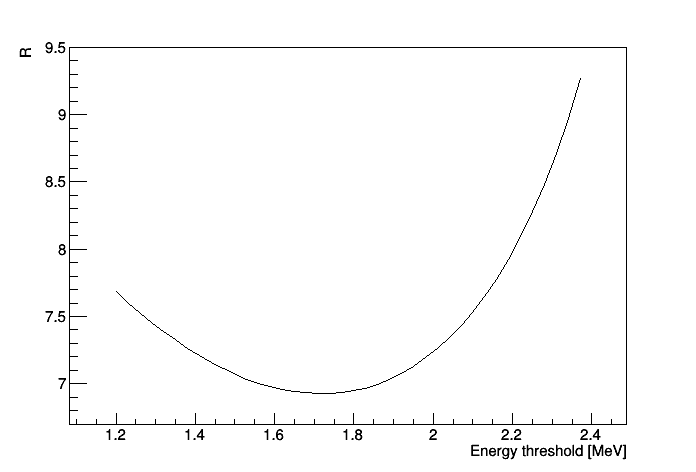

In [251]:
c = R.TCanvas()
error_graphs_T[4].Draw()
c.Draw()
error_graphs_T[4].GetMinimum()
xs = []
min = 10
nmin = 0
for n in range(2000):
    xs.append(error_graphs_T[4].Eval(1.6+n*0.0001))
    if xs[-1]<min:
        min = xs[-1]
        xmin = 1.6+n*0.0001

# print xmin, th2_all_origin.GetYaxis().FindBin(1.71)
# print th2_all_origin.GetYaxis().GetBinWidth(1)

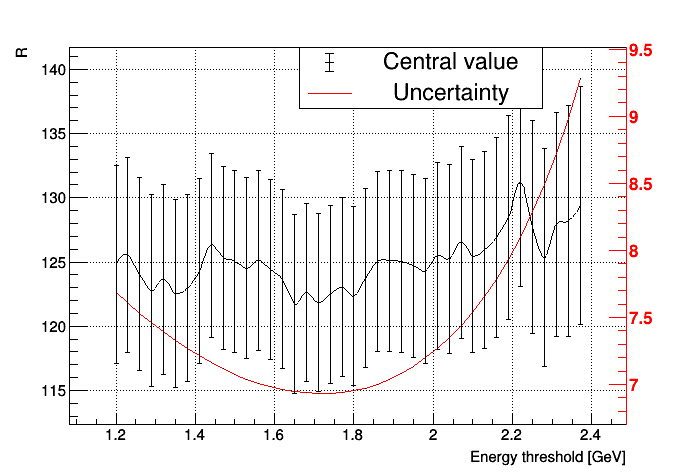

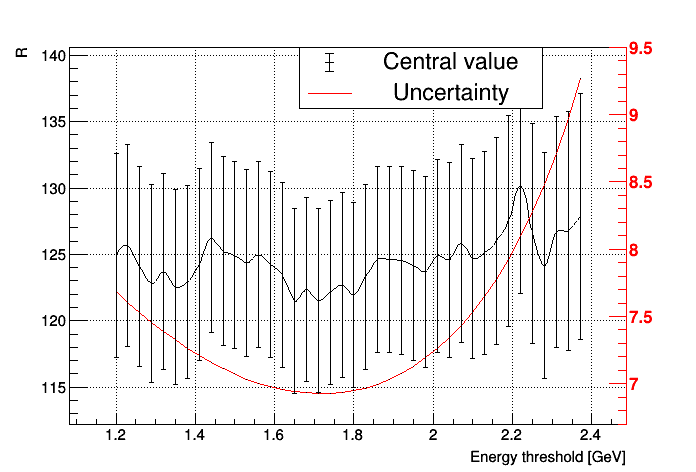

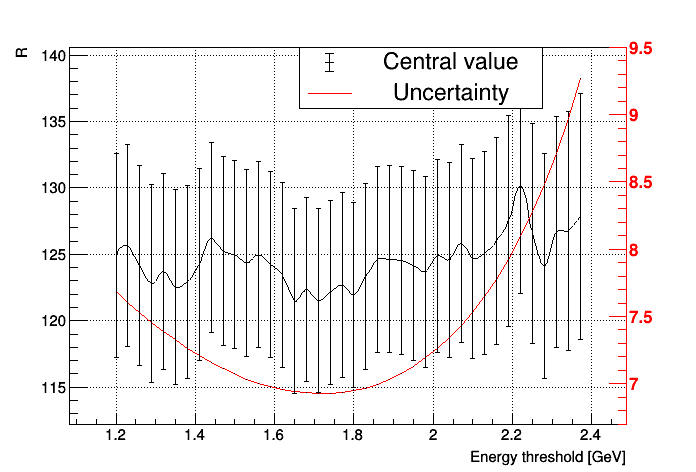

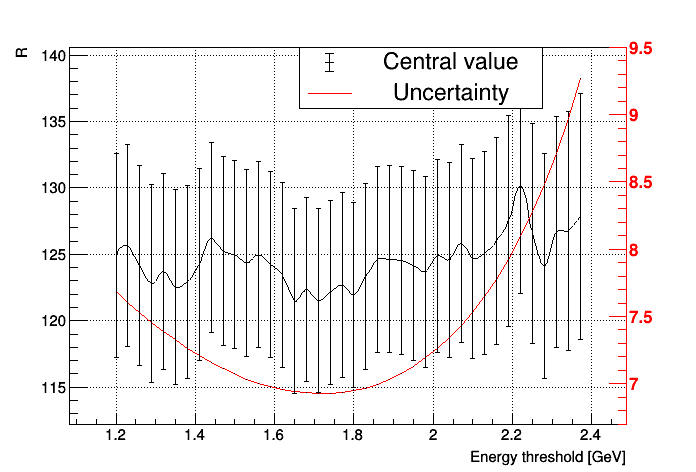

In [259]:
R.gStyle.SetOptFit(1111)
R.gStyle.SetOptStat(0)
c = R.TCanvas('egraph R','wiggles',1900,1600)
c.Divide(2,2)
cs = []
for n in range(4):
    
    central_graphs_Ts[n][4].SetTitle(';%s;%s'%('Energy threshold [GeV]',names[4]))
    c = Draw_graph_and_error(central_graphs_Ts[n][4],error_graphs_Ts[n][4])
    cs.append(c)
    cs[-1][0].Draw()


In [321]:
#fit wiggles
e_raw = raw.ProjectionX('raw',57,208)
FiveParameterFit(e_raw,fitFunc)
e_raw.SetTitle('No correction')
e_corrected = []
names = ['One iteration','Two iterations','Three iterations']
for n in range(3):
    e_corr = corrected[n].ProjectionX('pu%s'%(n),57,208)
    FiveParameterFit(e_corr,fitFunc)
    e_corr.SetTitle(names[n])
    e_corrected.append(e_corr)
    

bin width =  0.1492
bin width =  0.1492
bin width =  0.1492
bin width =  0.1492


Warning in <TCanvas::Constructor>: Deleting canvas with same name: wiggles


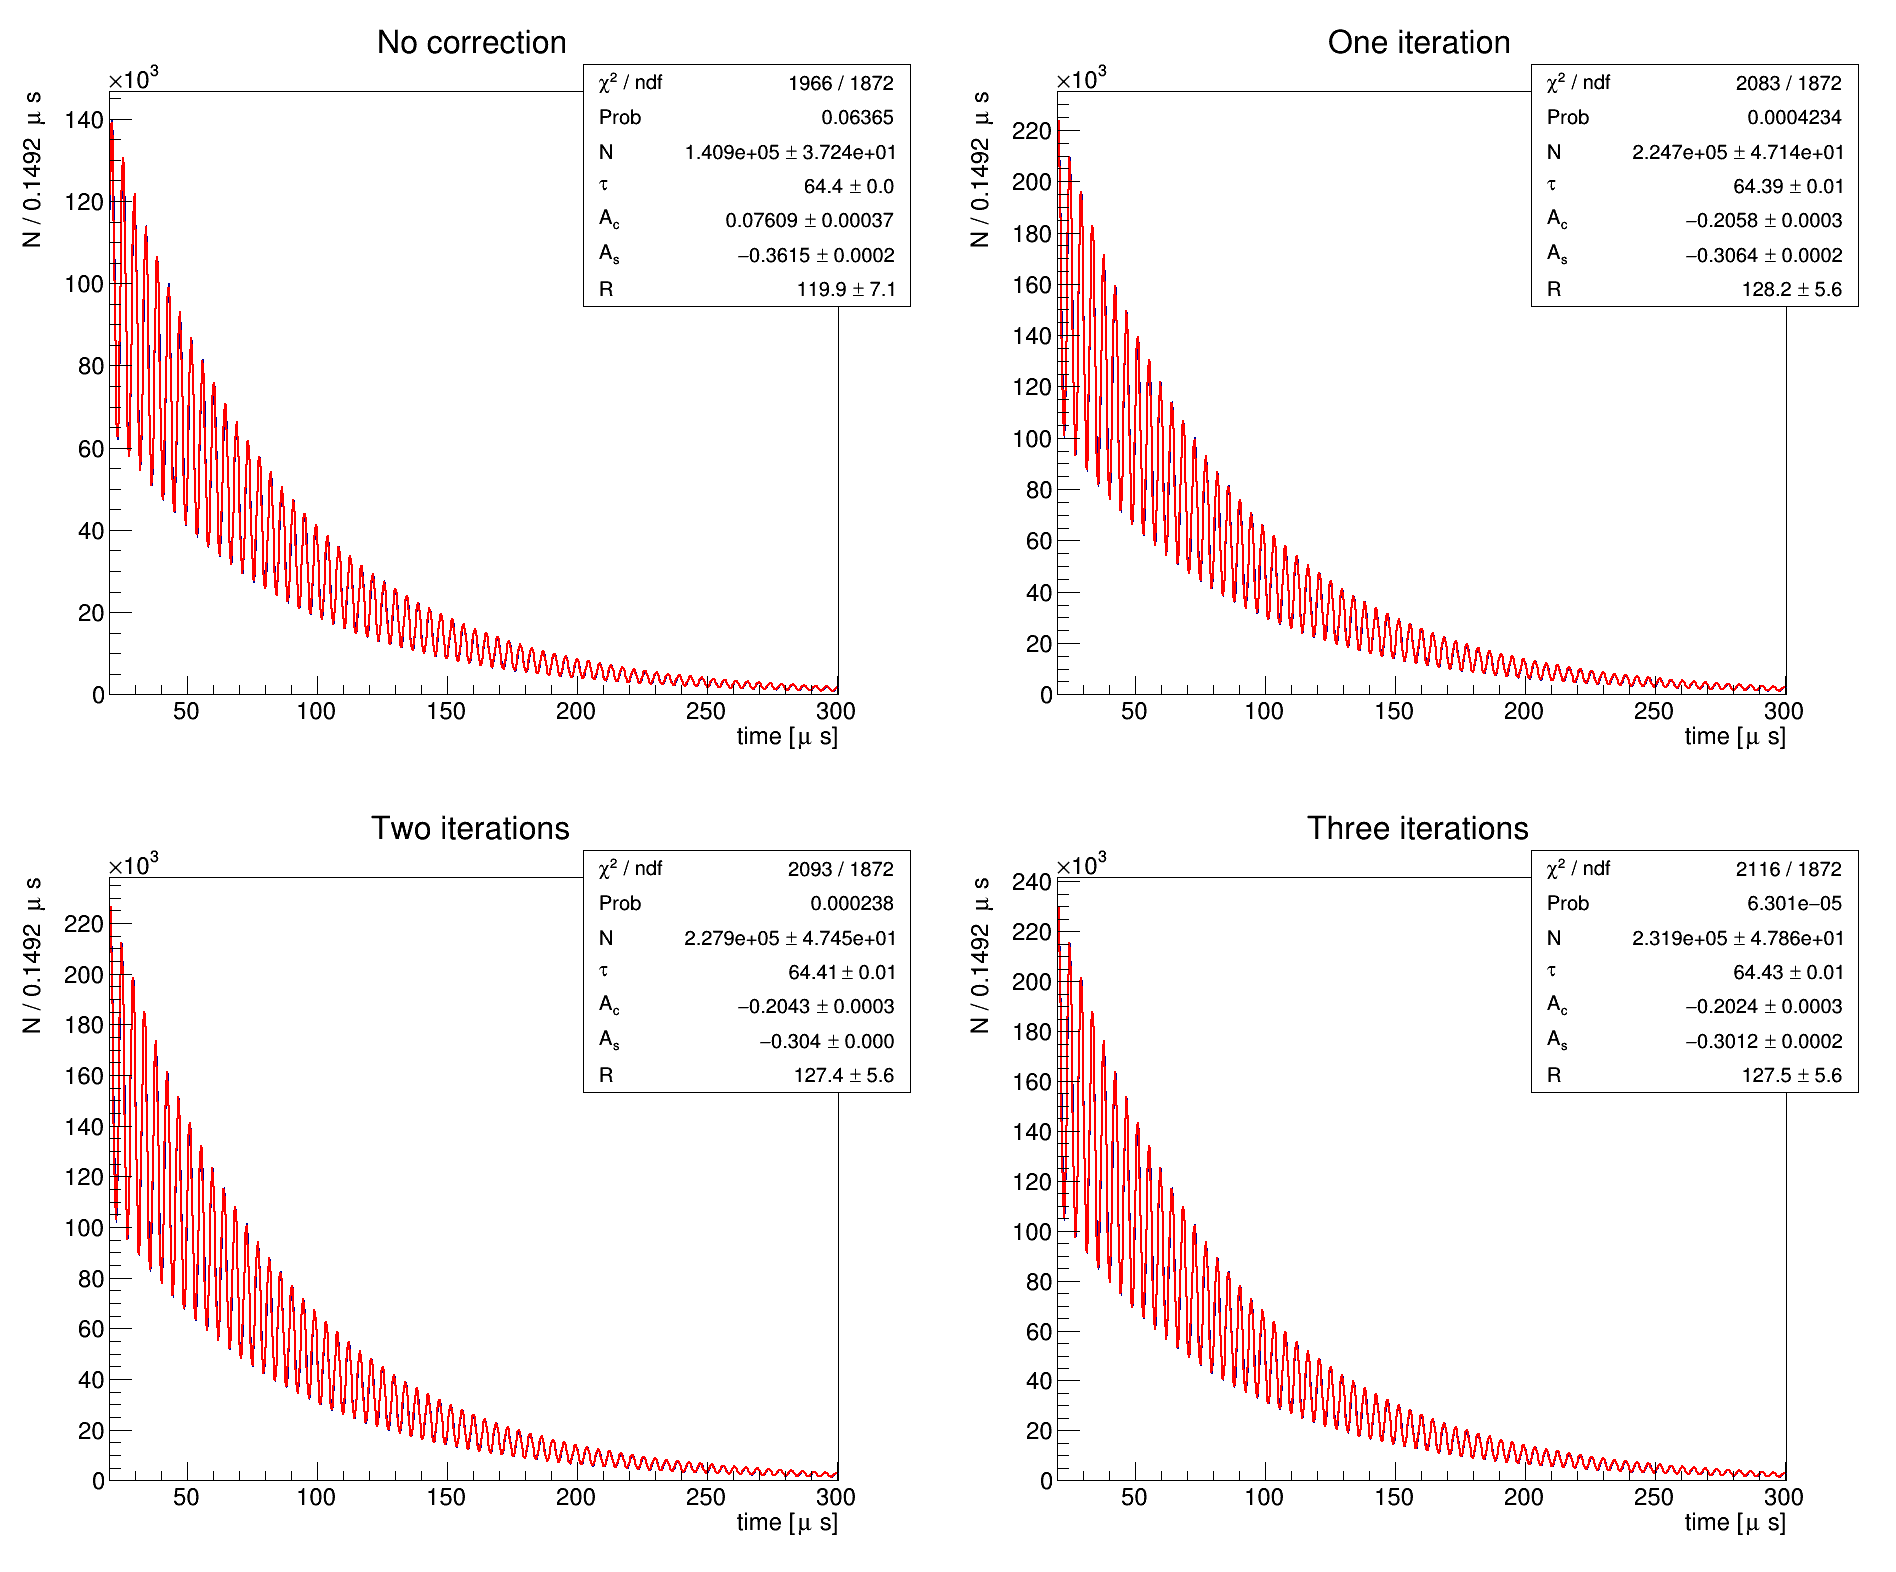

In [322]:
R.gStyle.SetOptFit(1111)
R.gStyle.SetOptStat(0)
c = R.TCanvas('wiggles','wiggles',1900,1600)
c.Divide(2,2)
c.cd(1)
e_raw.Draw()
e_raw.GetYaxis().SetTitleOffset(1.5)
for n in range(3):
    c.cd(n+2)
    e_corrected[n].GetYaxis().SetTitleOffset(1.5)
    e_corrected[n].Draw()
c.cd(0)
c.Draw()

In [227]:
#analysis residuals
residuals = []
ffts = []
ffts_wiggle = []

hists = [e_raw] +  e_corrected
names = ['No correction', 'One iteration', 'Two iteration','Three iteration']
for ncalo,hist in enumerate(hists):
    residual = hist.Clone()
    residual.Reset()
    residual.GetXaxis().SetRangeUser(t_start,300)
    residual.SetName('residual_calo_{0:}'.format(names[ncalo]))    
    for nBin in range(1,residual.GetNbinsX()+1):
        bin_center = residual.GetXaxis().GetBinCenter(nBin)
        fit_val = hist.GetFunction('fitFunc').Eval(bin_center)
        bin_content = hist.GetBinContent(nBin)
        residual.SetBinContent(nBin,bin_content - fit_val)        
    residuals.append(residual)
    NbinsX = residual.GetNbinsX()
    fft = R.TH1F('FFT{0:}'.format(names[ncalo]),'FFT  {0:};f [MHz]'.format(names[ncalo]),NbinsX,0,1./0.1492)
    fft_wiggile  = R.TH1F('FFT wiggle {0:}'.format(names[ncalo]),'FFT wiggle {0:};f [MHz]'.format(names[ncalo]),NbinsX,0,1./0.1492)
    fft.SetTitle('FFT  {0:}, residual '.format(names[ncalo]))
    residual.FFT(fft,'MAG')
    hist.FFT(fft_wiggile,'MAG')
    ffts.append(fft)
    ffts_wiggle.append(fft_wiggile)
    


Warning in <TFile::Append>: Replacing existing TH1: FFTNo correction (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: FFT wiggle No correction (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: FFTOne iteration (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: FFT wiggle One iteration (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: FFTTwo iteration (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: FFT wiggle Two iteration (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: FFTThree iteration (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: FFT wiggle Three iteration (Potential memory leak).


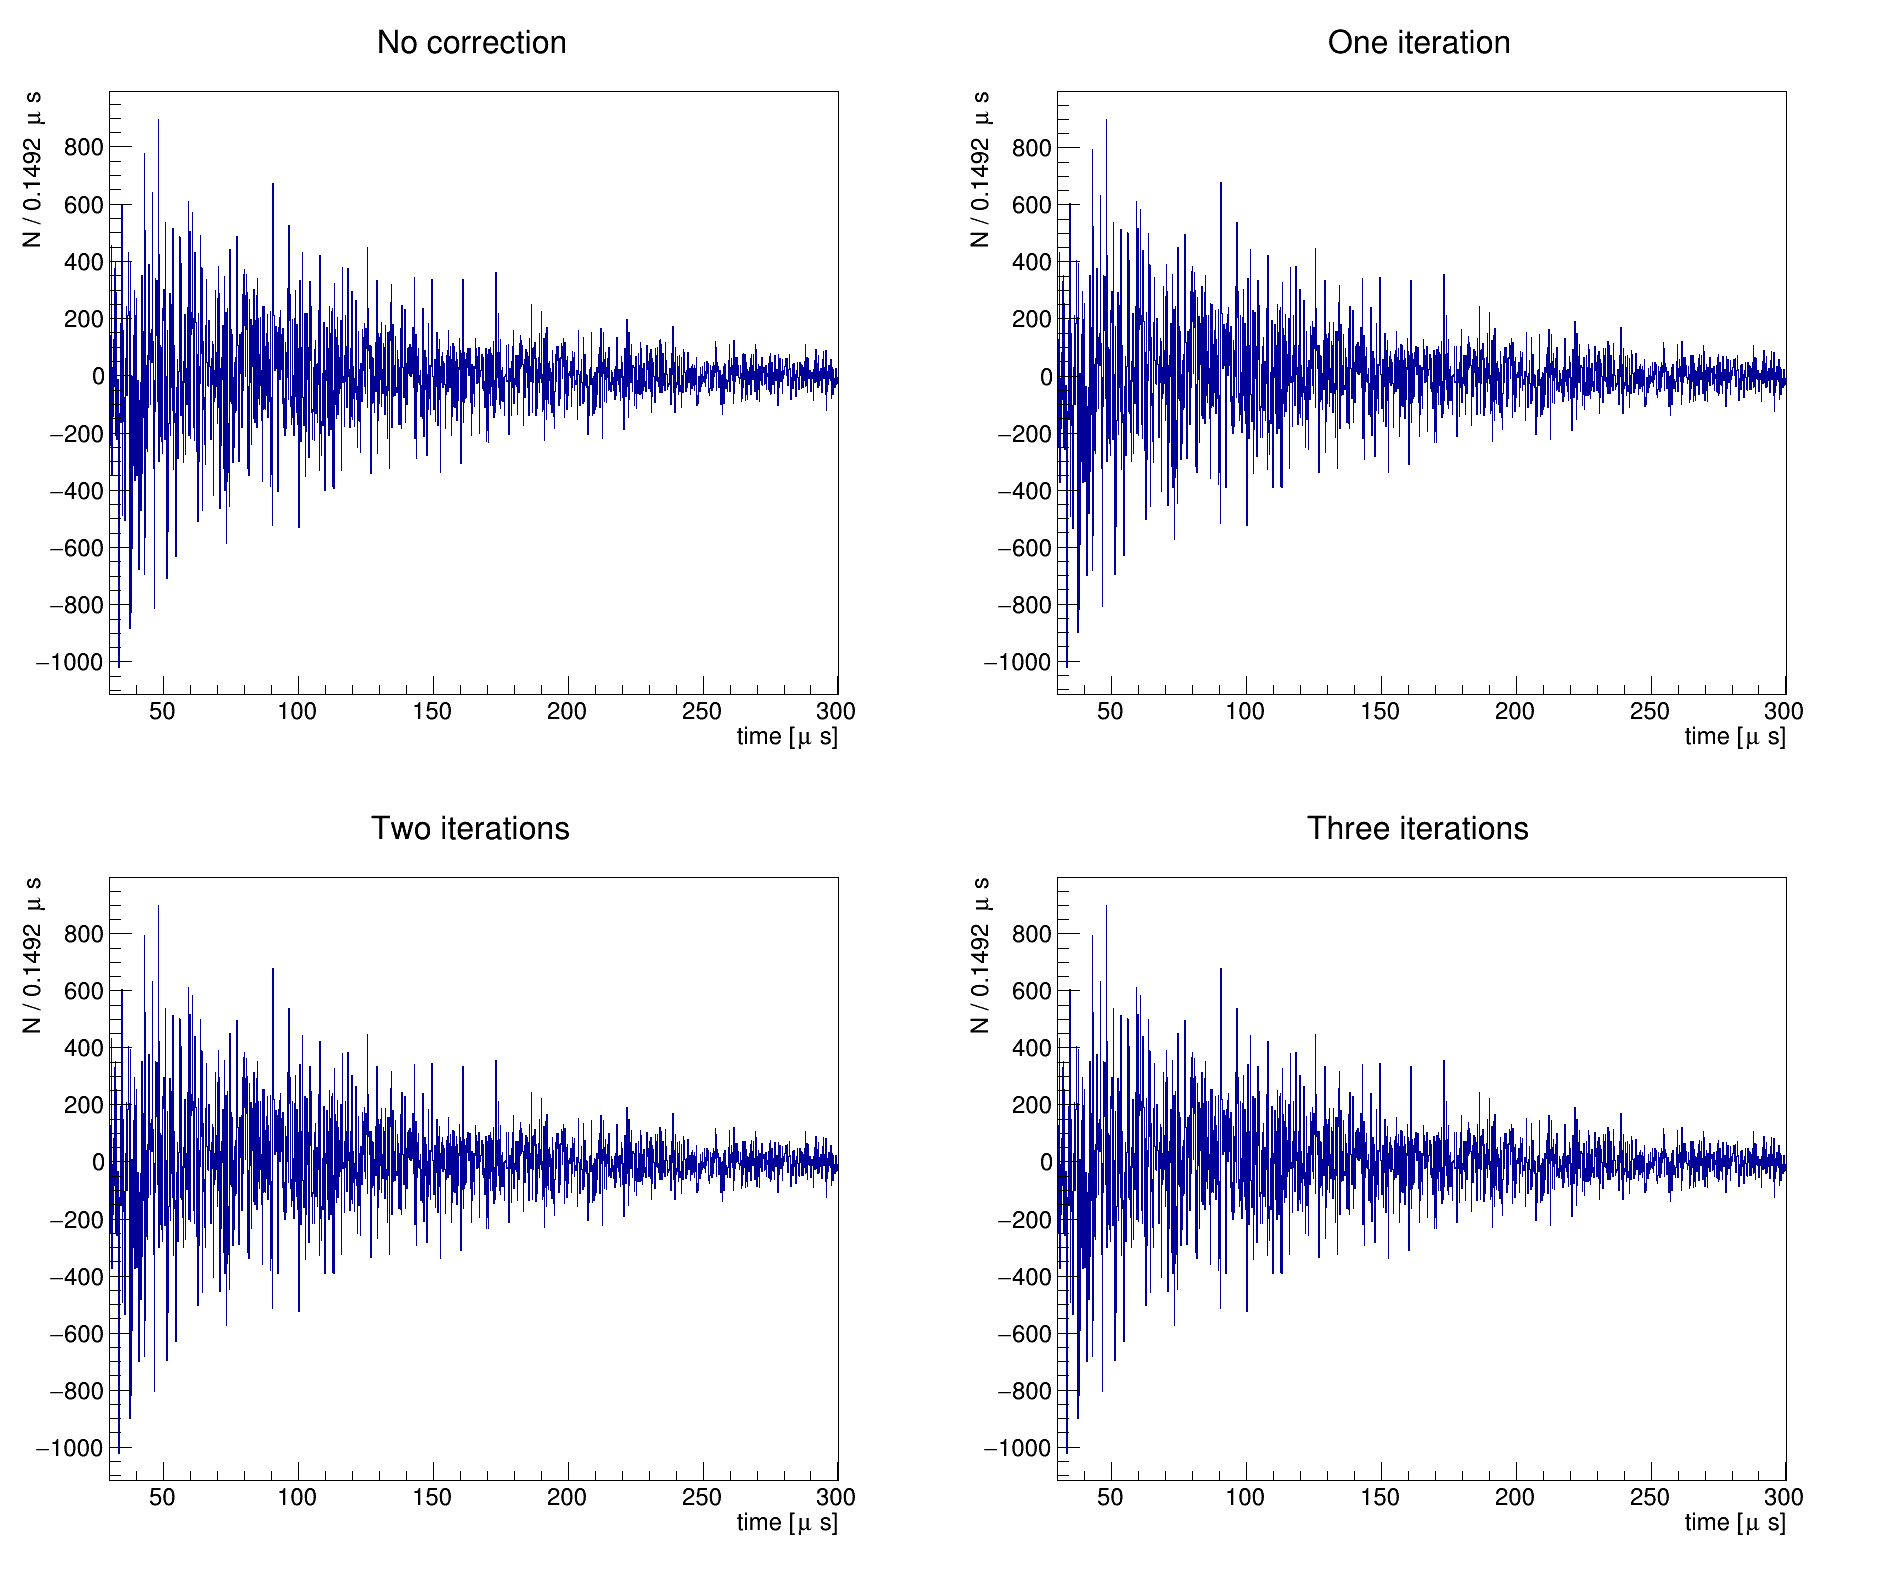

In [228]:
R.gStyle.SetOptFit(0)
R.gStyle.SetOptStat(0)
c = R.TCanvas('residuals','residuals',1900,1600)
c.Divide(2,2)
c.cd(1)
# e_raw.Draw()

for n in range(4):
    residuals[n].GetYaxis().SetTitleOffset(1.5)
    # residuals[n].GetFunction('fitFunc').ResetBit(R.TF1.kNotDraw)
    c.cd(n+1)    
    residuals[n].Draw()
c.cd(0)
c.Draw()

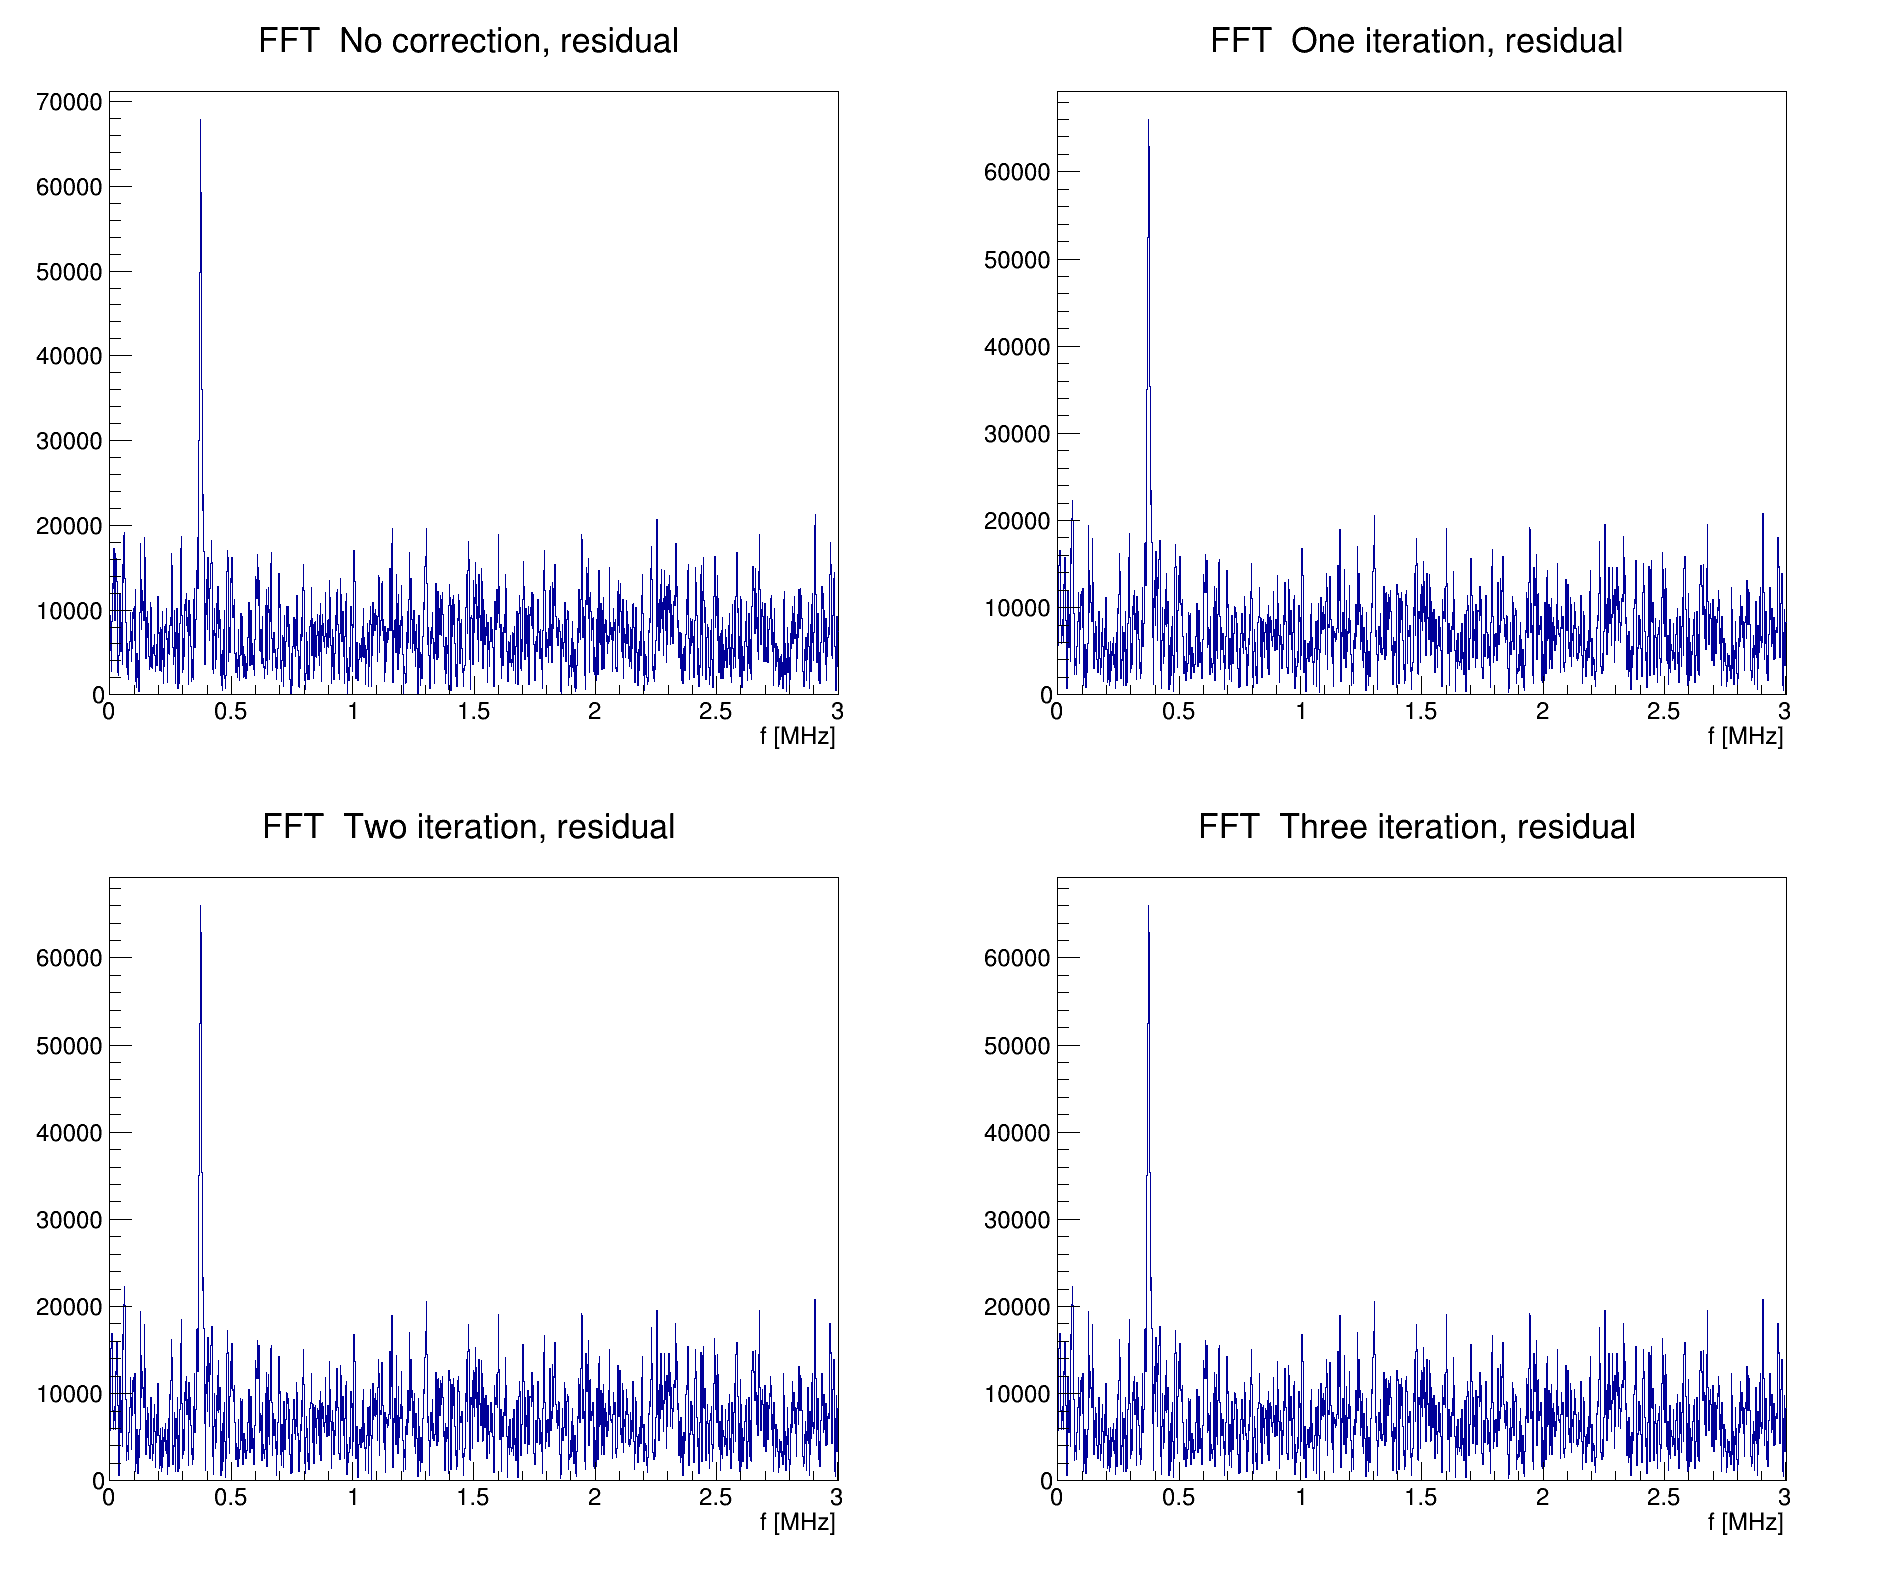

In [261]:

c = R.TCanvas('ffts','ffts',1900,1600)
c.Divide(2,2)
c.cd(1)
# e_raw.Draw()

for n in range(4):
    ffts[n].GetYaxis().SetTitleOffset(1.5)
    c.cd(n+1)
    ffts[n].GetXaxis().SetRangeUser(0,3)
    ffts[n].Draw()
c.cd(0)
c.Draw()

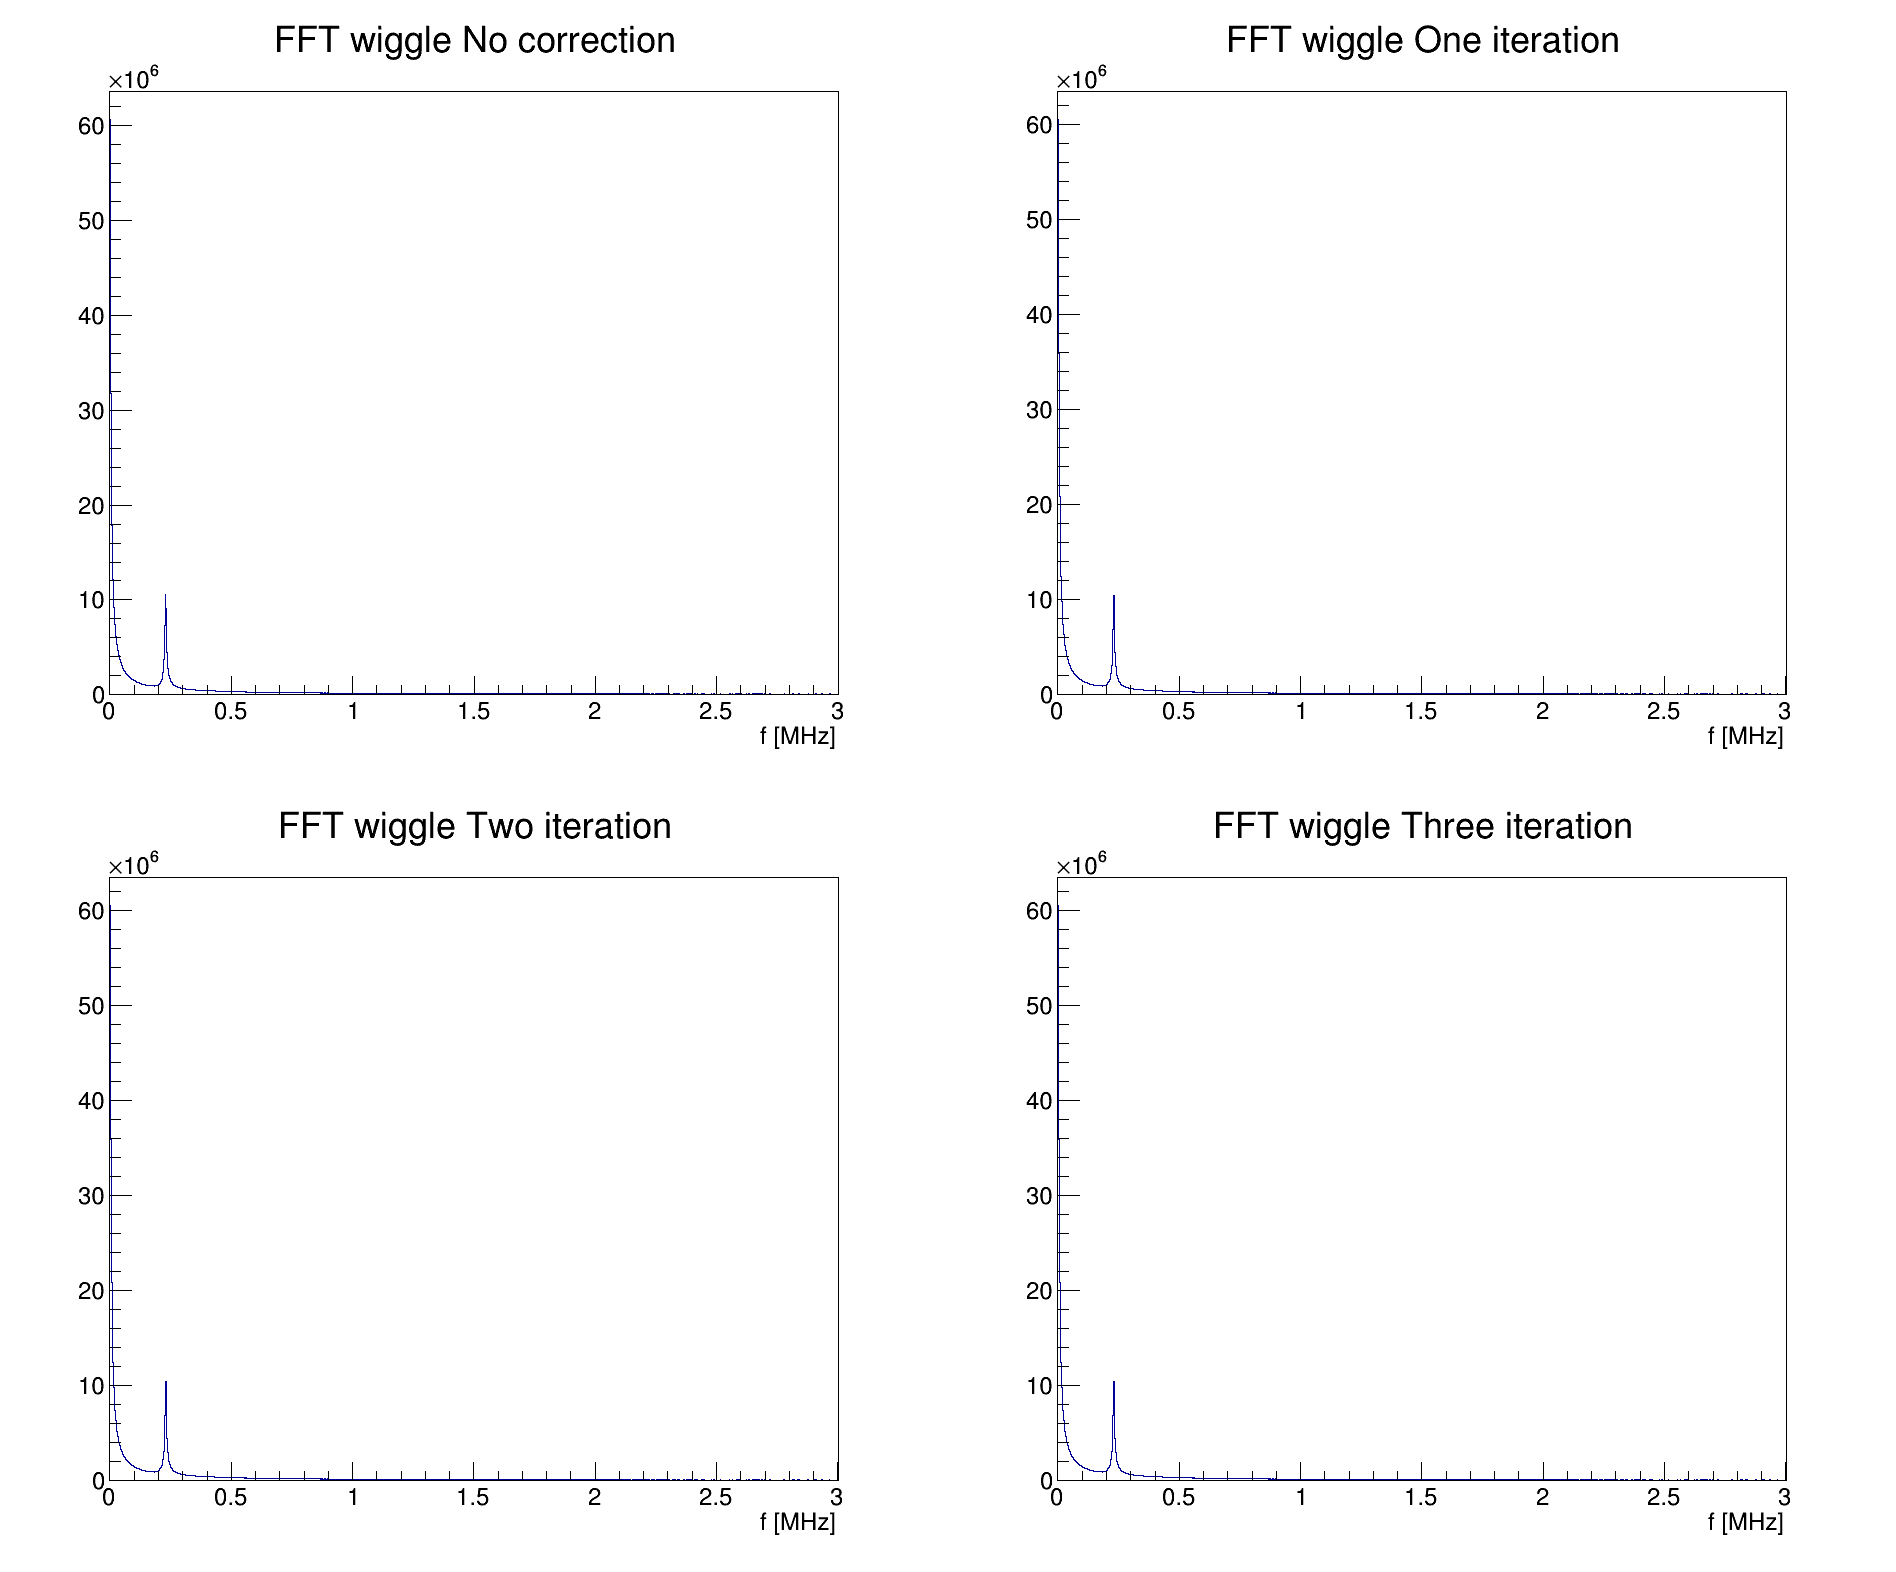

In [262]:

c = R.TCanvas('ffts_wiggle','ffts_wiggle',1900,1600)
c.Divide(2,2)
c.cd(1)
# e_raw.Draw()

for n in range(4):
    ffts_wiggle[n].GetYaxis().SetTitleOffset(1.5)    
    c.cd(n+1)
    ffts_wiggle[n].Draw()
    ffts_wiggle[n].GetXaxis().SetRangeUser(0,3)
c.cd(0)
c.Draw()

In [290]:
hists = {}

In [301]:



version = 'both'
hists[version] = [fit_hists['official']] + [fit_hists['%s_%s'%(version,30-n*5)] for n in range(3)]
names = ['Official production','Primary+residual @ 30 MeV','Primary+residual @ 25 MeV','Primary+residual @ 20 MeV']

In [302]:
names = ['N','tau','Ac','As','R']
namesPhase = ['N','tau','A','phi','R']
xmins = []

central_graphs_Ts = []
error_graphs_Ts = []
# th2_all_origin = corrected[2].Clone()
for th2_all_origin in hists['both']:
    e_bin_width = th2_all_origin.GetYaxis().GetBinWidth(1)
    #energy threshold scan T method
    central_graphs_T = [R.TGraphErrors() for n in range(5)]
    error_graphs_T = [R.TGraph() for n in range(5)]
    name_temp = 'energythreshold_%s_%s'
    #setup graphs
    for n in range(5):
        central_graphs_T[n].SetName(name_temp%(names[n],'graph'))
        error_graphs_T[n].SetName(name_temp%(names[n],'error'))
        central_graphs_T[n].SetTitle(';%s;%s'%('Energy threshold [GeV]',names[n]))
        error_graphs_T[n].SetTitle(';%s;%s'%('Energy threshold [GeV]',names[n]))
    NbinsY = th2_all_origin.GetNbinsY()
    #do scan
    phase_fit.SetParameters(2e+5, 66.38, 0.4, 0.0, 433, omega_a_ref)
    nstart = 40
    nend = 80
    for n in range(nstart,nend):
        this_threshold = (n) * e_bin_width
        wiggle = th2_all_origin.ProjectionX('wiggle_energy_thres_%s_GeV'%(this_threshold),n,NbinsY)
        PhaseFit(wiggle,phase_fit,t_start,t_end)
        # wiggle.Fit(phase_fit,'EMQ','',t_start,t_end)
        for m in range(5):
            value = phase_fit.GetParameter(m)
            error = phase_fit.GetParError(m)
            # if m==4:
            #     print '{0:<.3f}   {1:<.3f}'.format(value,error)
            central_graphs_T[m].SetPoint(n-nstart,this_threshold,value)
            central_graphs_T[m].SetPointError(n-nstart,0.,error)
            error_graphs_T[m].SetPoint(n-nstart,this_threshold,error)
    central_graphs_Ts.append(central_graphs_T)
    error_graphs_Ts.append(error_graphs_T)

    xs = []
    min = 10
    for n in range(2000):
        xs.append(error_graphs_T[4].Eval(1.6+n*0.0001))
        if xs[-1]<min:
            min = xs[-1]
            xmin = 1.6+n*0.0001
            if xs[-1]<5.5:
                # print xmin
                pass
    print xmin,error_graphs_T[4].Eval(xmin)
    xmins.append(xmin)

1.74 5.49798643632
1.74 5.49644405497
1.74 5.49851022768
1.77 5.5008847784


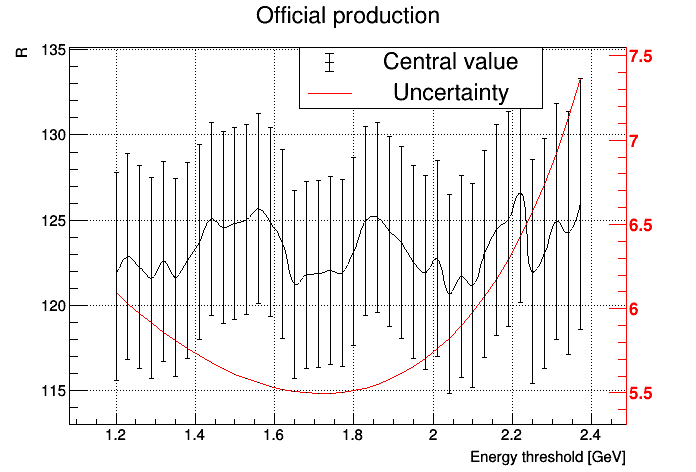

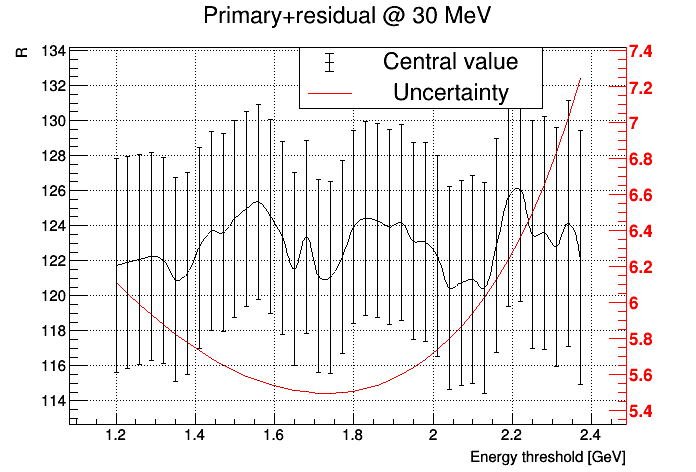

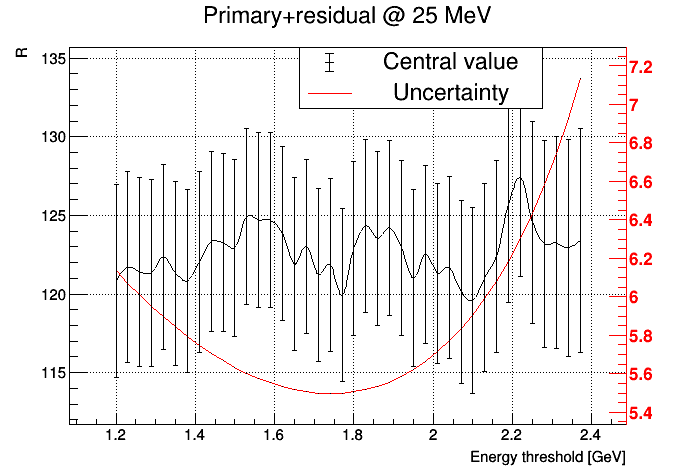

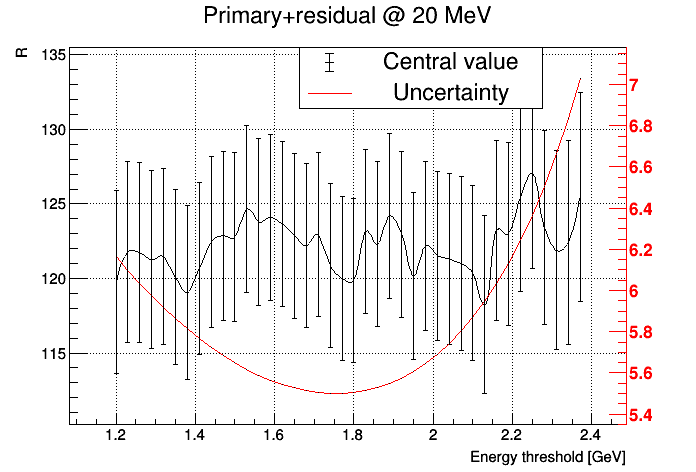

In [303]:
# print len(central_graphs_Ts)
# print len(central_graphs_Ts[0])

names = ['Official production','Primary+residual @ 30 MeV','Primary+residual @ 25 MeV','Primary+residual @ 20 MeV']
R.gStyle.SetOptFit(1111)
R.gStyle.SetOptStat(0)
c = R.TCanvas('egraph R','wiggles',1900,1600)
c.Divide(2,2)
cs = []
for n in range(4):
    
    central_graphs_Ts[n][4].SetTitle('%s;%s;%s'%(names[n],'Energy threshold [GeV]','R'))
    c = Draw_graph_and_error(central_graphs_Ts[n][4],error_graphs_Ts[n][4])
    cs.append(c)
    cs[-1][0].Draw()


In [305]:
print xmins
print hists['both'][0].GetYaxis().FindBin(1.74)
print hists['both'][0].GetYaxis().FindBin(1.77)

[1.7400000000000002, 1.7400000000000002, 1.7400000000000002, 1.77]
59
60


In [306]:



version = 'primary'
hists[version] = [fit_hists['official']] + [fit_hists['%s_%s'%(version,30-n*5)] for n in range(3)]
names = ['Official production','Primary @ 30 MeV','Primary @ 25 MeV','Primary @ 20 MeV']

In [309]:
names = ['N','tau','Ac','As','R']
namesPhase = ['N','tau','A','phi','R']
xmins = []

central_graphs_Ts = []
error_graphs_Ts = []
# th2_all_origin = corrected[2].Clone()
for th2_all_origin in hists[version]:
    e_bin_width = th2_all_origin.GetYaxis().GetBinWidth(1)
    #energy threshold scan T method
    central_graphs_T = [R.TGraphErrors() for n in range(5)]
    error_graphs_T = [R.TGraph() for n in range(5)]
    name_temp = 'energythreshold_%s_%s'
    #setup graphs
    for n in range(5):
        central_graphs_T[n].SetName(name_temp%(names[n],'graph'))
        error_graphs_T[n].SetName(name_temp%(names[n],'error'))
        central_graphs_T[n].SetTitle(';%s;%s'%('Energy threshold [GeV]',names[n]))
        error_graphs_T[n].SetTitle(';%s;%s'%('Energy threshold [GeV]',names[n]))
    NbinsY = th2_all_origin.GetNbinsY()
    #do scan
    phase_fit.SetParameters(2e+5, 66.38, 0.4, 0.0, 433, omega_a_ref)
    nstart = 40
    nend = 80
    for n in range(nstart,nend):
        this_threshold = (n) * e_bin_width
        wiggle = th2_all_origin.ProjectionX('wiggle_energy_thres_%s_GeV'%(this_threshold),n,NbinsY)
        PhaseFit(wiggle,phase_fit,t_start,t_end)
        # wiggle.Fit(phase_fit,'EMQ','',t_start,t_end)
        for m in range(5):
            value = phase_fit.GetParameter(m)
            error = phase_fit.GetParError(m)
            # if m==4:
            #     print '{0:<.3f}   {1:<.3f}'.format(value,error)
            central_graphs_T[m].SetPoint(n-nstart,this_threshold,value)
            central_graphs_T[m].SetPointError(n-nstart,0.,error)
            error_graphs_T[m].SetPoint(n-nstart,this_threshold,error)
    central_graphs_Ts.append(central_graphs_T)
    error_graphs_Ts.append(error_graphs_T)

    xs = []
    min = 10
    for n in range(2000):
        xs.append(error_graphs_T[4].Eval(1.6+n*0.0001))
        if xs[-1]<min:
            min = xs[-1]
            xmin = 1.6+n*0.0001
    xmins.append(xmin)
    print xmin

1.74
1.74
1.74
1.77


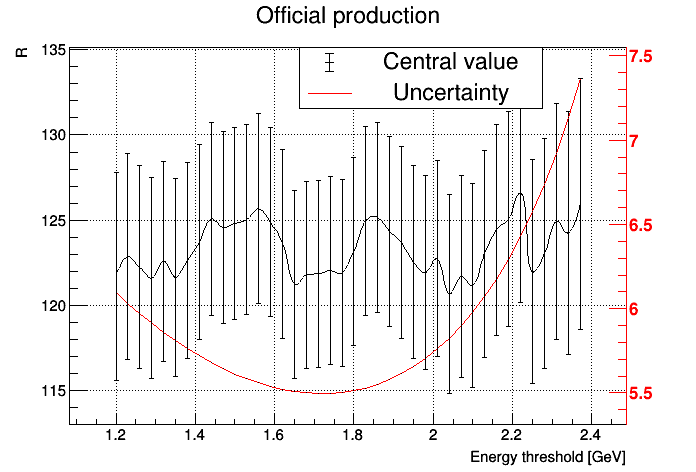

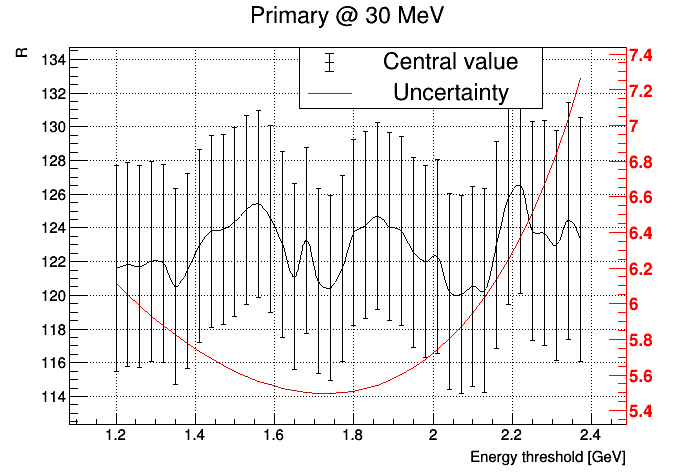

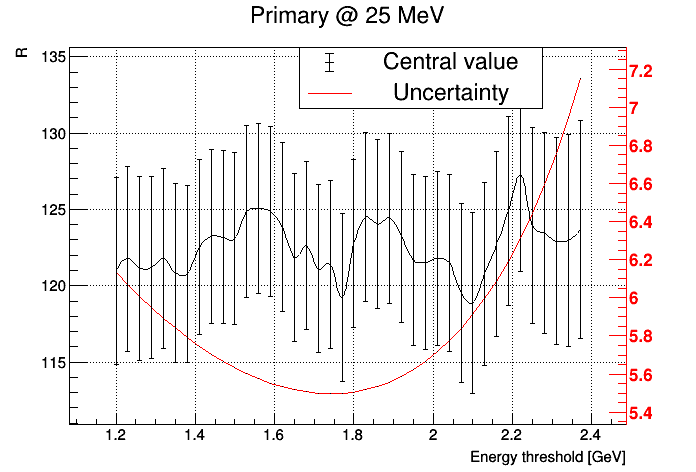

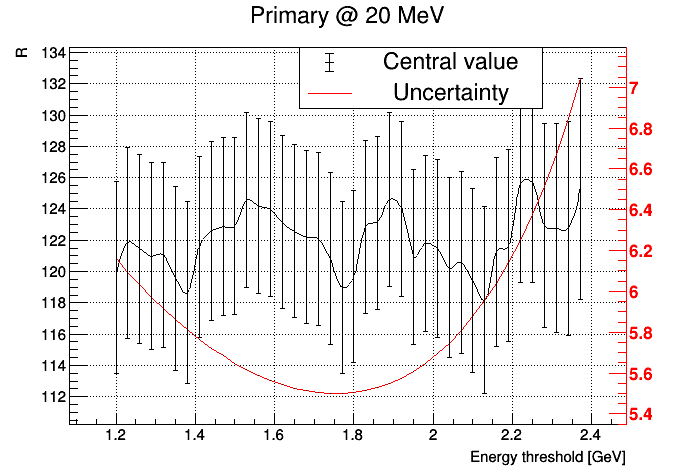

In [288]:
# print len(central_graphs_Ts)
# print len(central_graphs_Ts[0])

names = ['Official production','Primary @ 30 MeV','Primary @ 25 MeV','Primary @ 20 MeV']
R.gStyle.SetOptFit(1111)
R.gStyle.SetOptStat(0)
c = R.TCanvas('egraph R','wiggles',1900,1600)
c.Divide(2,2)
cs = []
for n in range(4):
    
    central_graphs_Ts[n][4].SetTitle('%s;%s;%s'%(names[n],'Energy threshold [GeV]','R'))
    c = Draw_graph_and_error(central_graphs_Ts[n][4],error_graphs_Ts[n][4])
    cs.append(c)
    cs[-1][0].Draw()


In [310]:
print xmins
print hists['primary'][0].GetYaxis().FindBin(1.74)

[1.7400000000000002, 1.7400000000000002, 1.7400000000000002, 1.77]
59


In [323]:
#fit wiggles
corrected = hists['both']
e_corrected = []
names = ['Official production','Primary+residual @ 30 MeV','Primary+residual @ 25 MeV','Primary+residual @ 20 MeV']
thresholds = [57,59,59,59]
for n in range(4):
    e_corr = corrected[n].ProjectionX('pu%s'%(n),thresholds[n],208)
    FiveParameterFit(e_corr,fitFunc)
    e_corr.SetTitle(names[n])
    e_corrected.append(e_corr)
    

bin width =  0.1492
bin width =  0.1492
bin width =  0.1492
bin width =  0.1492


Warning in <TCanvas::Constructor>: Deleting canvas with same name: wiggles


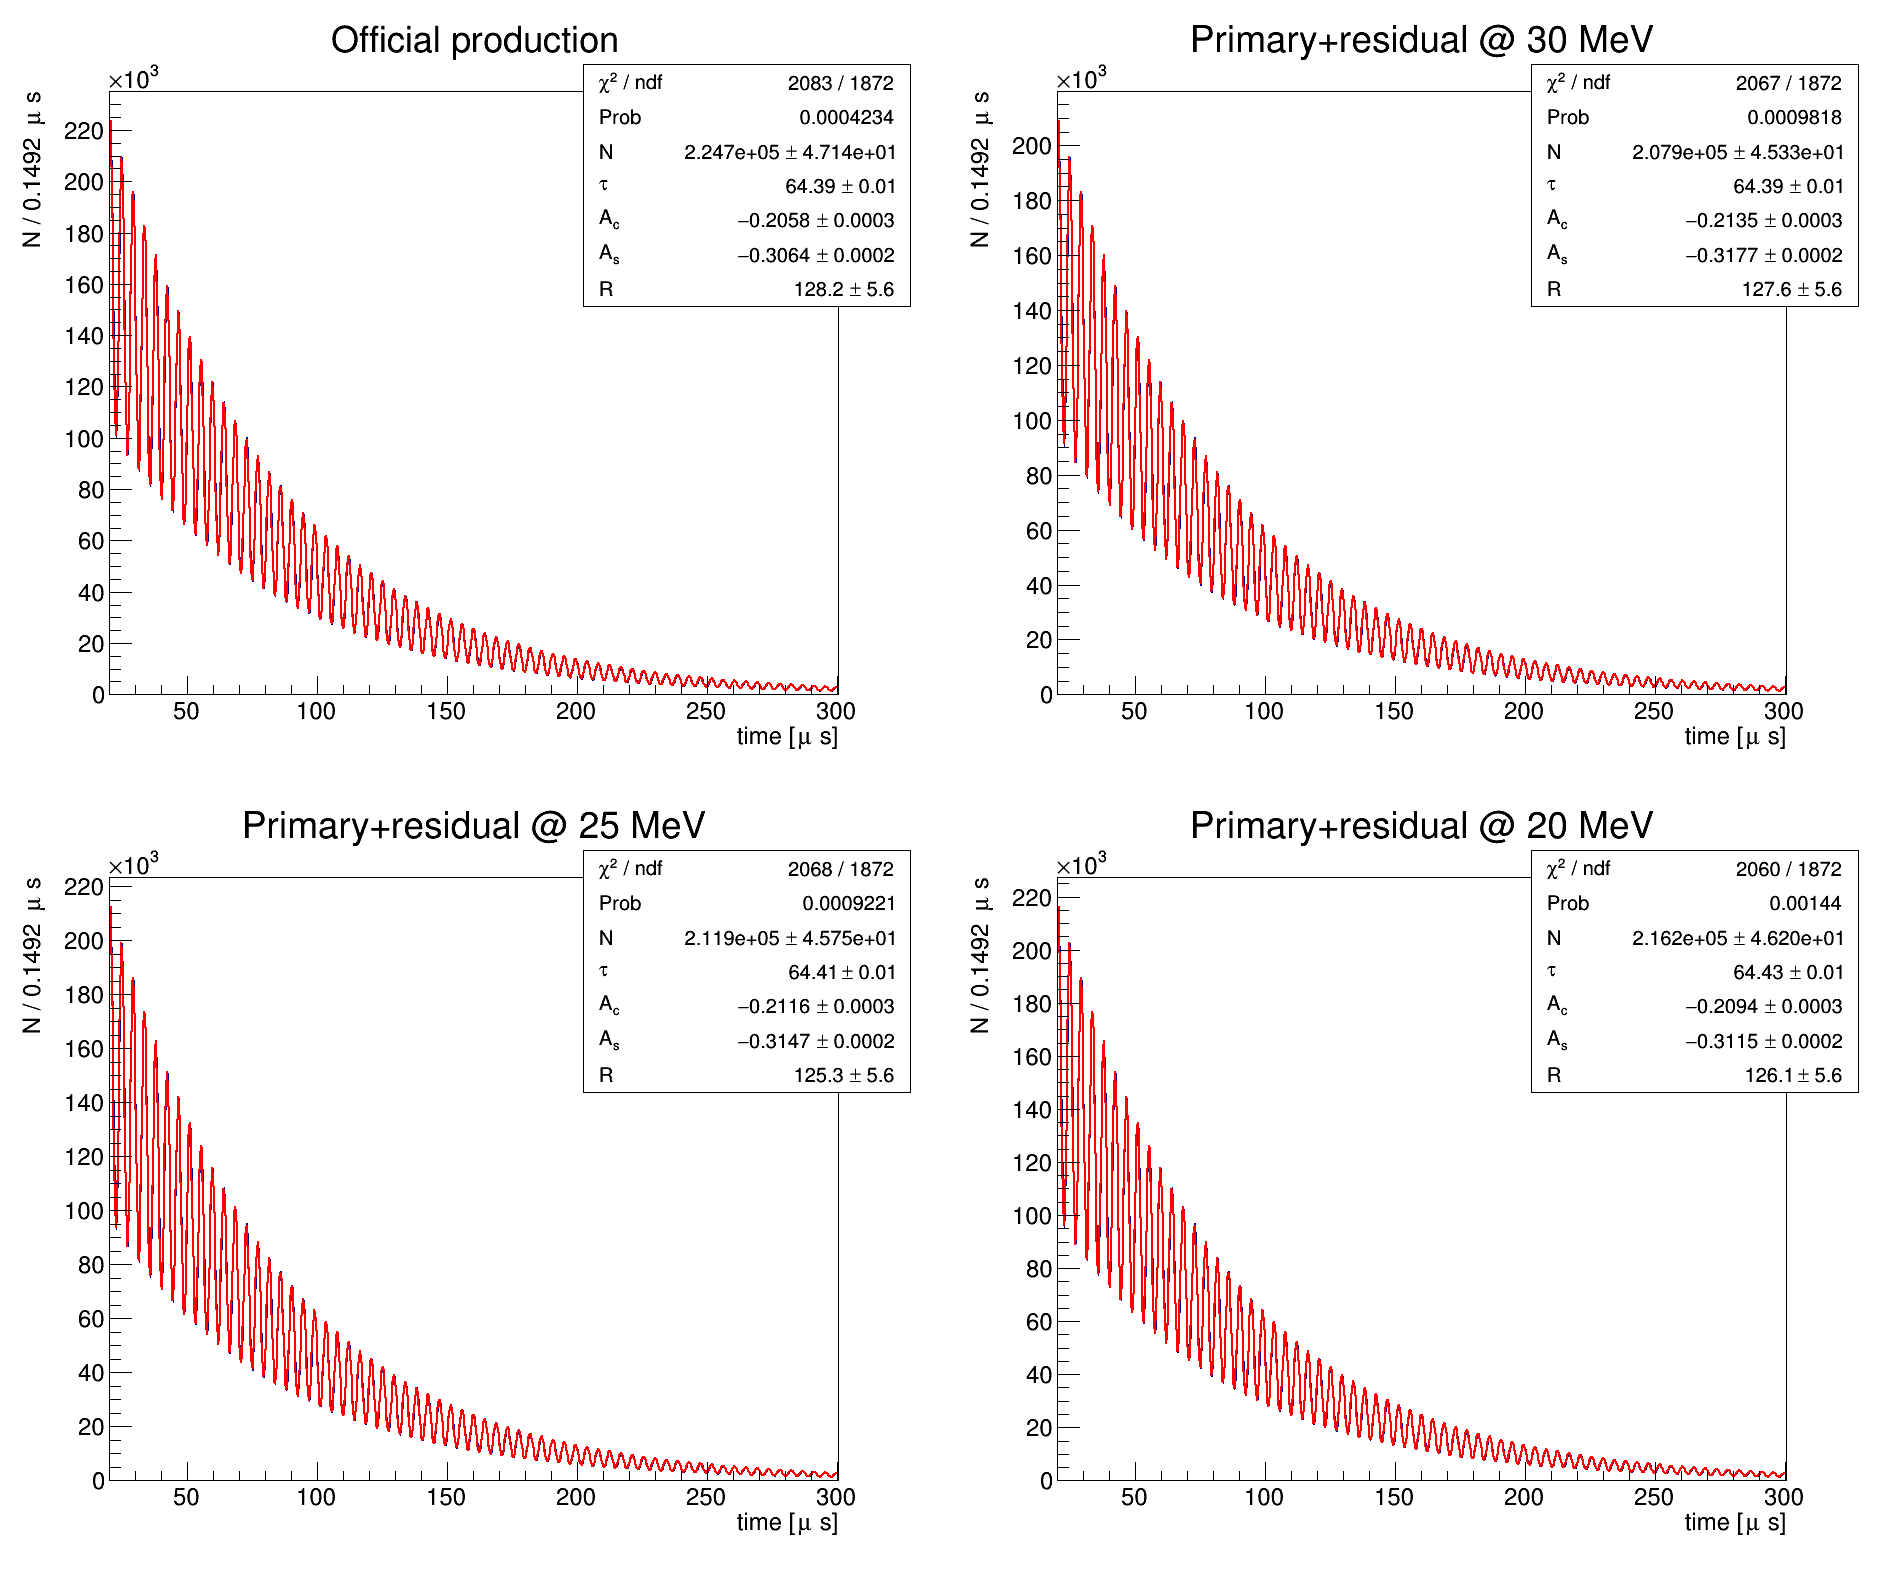

In [324]:
R.gStyle.SetOptFit(1111)
R.gStyle.SetOptStat(0)
c = R.TCanvas('wiggles','wiggles',1900,1600)
c.Divide(2,2)


for n in range(4):
    c.cd(n+1)
    e_corrected[n].GetYaxis().SetTitleOffset(1.5)
    e_corrected[n].Draw()
c.cd(0)
c.Draw()